## AccelerateAI - Time Series Analysis and Forecasting

### ARIMA Models

In [11]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt

In [4]:
# Read the daily website visits data
visits=pd.read_csv('website-visits.csv')

In [5]:
# Data Cleaning
visits=visits.replace(',','',regex=True)
visits['PageLoads']=visits['PageLoads'].astype(int)
visits['UniqueVisits']=visits['UniqueVisits'].astype(int)
visits['FirstTimeVisits']=visits['FirstTimeVisits'].astype(int)
visits['ReturningVisits']=visits['ReturningVisits'].astype(int)

#Convert to datetime
visits['Date']= pd.to_datetime(visits['Date'])

#Check
visits.head()

,Row,Day,DayOfWeek,Date,PageLoads,UniqueVisits,FirstTimeVisits,ReturningVisits
0,1,Sunday,1,2014-09-14,2146,1582,1430,152
1,2,Monday,2,2014-09-15,3621,2528,2297,231
2,3,Tuesday,3,2014-09-16,3698,2630,2352,278
3,4,Wednesday,4,2014-09-17,3667,2614,2327,287
4,5,Thursday,5,2014-09-18,3316,2366,2130,236


### ARIMA using StatsModels 

In [7]:
from statsmodels.tsa.arima.model import ARIMA

# fit model
series = visits['UniqueVisits']
model = ARIMA(series, order=(5,0,0))
model_fit = model.fit()

# summary of fit model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:           UniqueVisits   No. Observations:                 2167
Model:                 ARIMA(5, 0, 0)   Log Likelihood              -16195.467
Date:                Sat, 29 Oct 2022   AIC                          32404.935
Time:                        12:04:58   BIC                          32444.702
Sample:                             0   HQIC                         32419.477
                               - 2167                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2943.6465    105.182     27.986      0.000    2737.494    3149.799
ar.L1          1.3480      0.018     73.140      0.000       1.312       1.384
ar.L2         -1.1884      0.031    -38.061      0.0

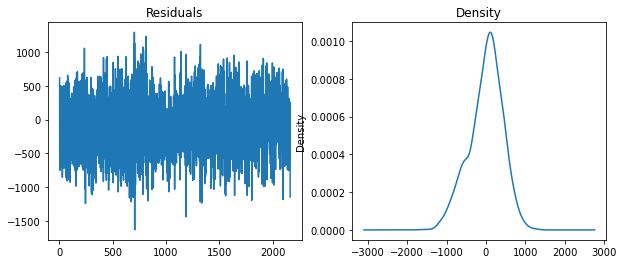

In [26]:
import matplotlib.pyplot as plt
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2, figsize=(10, 4))
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

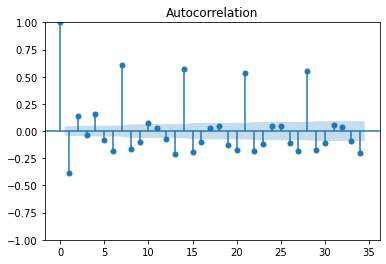

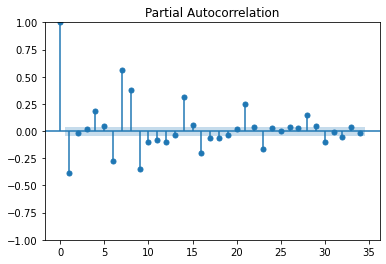

In [29]:
#ACF and PACF or residuals
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_res = plot_acf(residuals)
pacf_res = plot_pacf(residuals, method='ywm')

In [31]:
model = ARIMA(series, order=(5,1,1))
model_fit = model.fit()

# summary of fit model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:           UniqueVisits   No. Observations:                 2167
Model:                 ARIMA(5, 1, 1)   Log Likelihood              -15514.193
Date:                Sat, 29 Oct 2022   AIC                          31042.387
Time:                        12:23:49   BIC                          31082.151
Sample:                             0   HQIC                         31056.929
                               - 2167                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0019      0.023     -0.083      0.934      -0.046       0.043
ar.L2         -0.6857      0.014    -48.319      0.000      -0.714      -0.658
ar.L3         -0.3377      0.023    -14.839      0.0

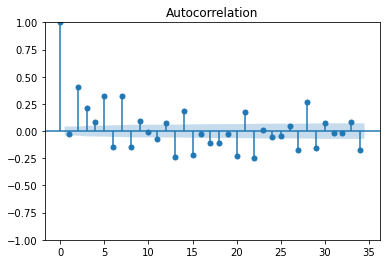

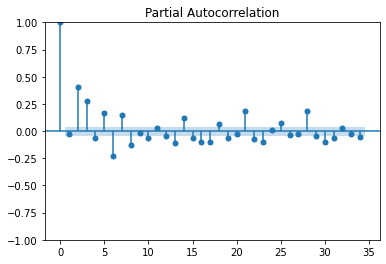

In [32]:
residuals = model_fit.resid[1:]
acf_res = plot_acf(residuals)
pacf_res = plot_pacf(residuals, method='ywm')

### ARIMA using Sktime

In [36]:
from sktime.forecasting.arima import ARIMA

In [39]:
# fit model
series = visits['UniqueVisits']
skt_model = ARIMA(order=(5,0,0), suppress_warnings=True)
skt_model.fit(series)

# summary of fit model
print(skt_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2167
Model:               SARIMAX(5, 0, 0)   Log Likelihood              -16195.455
Date:                Sat, 29 Oct 2022   AIC                          32404.911
Time:                        16:19:57   BIC                          32444.679
Sample:                             0   HQIC                         32419.454
                               - 2167                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    296.5780     40.451      7.332      0.000     217.295     375.861
ar.L1          1.3476      0.018     73.142      0.000       1.311       1.384
ar.L2         -1.1882      0.031    -38.083      0.0